# Linear regression with multiple variables

The goal of this notebook is to generalize [linear regression with one variable](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/linreg.ipynb) (also called *simple* linear regression) to multiple variables. The model is a natural extension to $n$ independent variables (or *features*):

\begin{equation}
f(x_1, x_2, \dots, x_n) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n.
\end{equation}

A single observation corresponds to a value for each $x_1, x_2, \dots, x_n$, as well as the dependent variable $y$. We will assume there are $m$ such observations. Let's start by establishing notation:

* $y^{(i)}$: value of the dependent variable for the $i^{\text{th}}$ observation.
* $x^{(i)}_{j}$: value of the $j^{\text{th}}$ feature for the $i^{\text{th}}$ observation.
* $x_0 \equiv 1$. In other words, $x^{(i)}_{0} = 1$ for all $i=1,\dots,m$.
* $x=\begin{pmatrix}x_0 \\ x_1 \\ \vdots \\ x_n\end{pmatrix} \in \mathbb{R}^{n+1}$ denotes the vector of features.
* $x^{(i)}=\begin{pmatrix}x^{(i)}_0 \\ x^{(i)}_1 \\ \vdots \\ x^{(i)}_n\end{pmatrix} \in \mathbb{R}^{n+1}$ denotes the vector of features for the $i^{\text{th}}$ observation.
* $\beta=\begin{pmatrix}\beta_0 \\ \beta_1 \\ \vdots \\ \beta_n\end{pmatrix} \in \mathbb{R}^{n+1}$ denotes the vector of parameters.
* $X_{ij} \equiv x^{(i)}_{j}$ for $i=1,\dots,m$ and $j=0,\dots,n$. $X$ is called the *design matrix*. It's an $m \times (n+1)$ dimensional matrix where each row contains the value of features for a given observation. Note that the first column is just a vector of $1$s, since by definition $x^{(i)}_{0} = 1$.
* $Y_i \equiv y^{(i)}$: $m$-dimensional vector created from $y^{(1)}, \dots, y^{(m)}$. It's sometimes called the *target vector*.

Expressing the data in vectorized form will make our life much easier. For instance, $f$ can now be expressed as a dot product:

\begin{equation}
f(x) = \beta^Tx.
\end{equation}

We will use the same cost function as we did for simple linear regression, i.e. the normalized sum of squared prediction errors:

\begin{align*}
J(\beta) &= \frac{1}{2m}\sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)})^2 \\
         &= \frac{1}{2m}\sum_{i=1}^{m} (\beta^Tx^{(i)} - y^{(i)})^2.
\end{align*}

Note that

\begin{equation}
\beta^Tx^{(i)} = \sum_{j=0}^{n} \beta_j x^{(i)}_{j} = \sum_{j=0}^{n} X_{ij}\beta_j = [X\beta]_{i}.
\end{equation}

This allows us to express $J$ in matrix form:

\begin{align*}
J(\beta) &= \frac{1}{2m}\sum_{i=1}^{m} (\beta^Tx^{(i)} - y^{(i)})^2 \\
         &= \frac{1}{2m}\sum_{i=1}^{m} ([X\beta]_{i} - Y_i)^2 \\
         &= \frac{1}{2m}\sum_{i=1}^{m} [X\beta - Y]_{i}[X\beta - Y]_{i} \\
         &= \frac{1}{2m}[X\beta - Y]^T[X\beta - Y].
\end{align*}

To find the parameters $\beta_0,\beta_1, \dots, \beta_n$ that best fit the data set, we will minimize $J$ with respect to each one of them. To do that, first we need the gradient of $J$ with respect to each $\beta_j$:

\begin{align*}
\frac{\partial J}{\partial \beta_j}
    &= \frac{1}{m}\sum_{i=1}^{m}(\beta^Tx^{(i)} - y^{(i)})x^{(i)}_{j} \\
    &= \frac{1}{m}\sum_{i=1}^{m}X_{ij}[X\theta - Y]_{i} \\
    &= \frac{1}{m} [X^T(X\beta - Y)]_j.
\end{align*}

Setting the gradients to zero:

\begin{equation}
\nabla J = 0 \to X^T(X\hat{\beta} - Y) = 0,
\end{equation}

we find that the optimal parameters $\hat{\beta}$ are given by

\begin{equation}
\hat{\beta} = (X^TX)^{-1}X^TY.
\end{equation}

This is called the *normal equation*. Does it reproduce the formulas we found for $\hat{\alpha}$ and $\hat{\beta}$ in [simple linear regression](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/linreg.ipynb)? Let's check. First note the mapping between the variables:

| Multiple LR     | Simple LR       |
|-----------------|-----------------|
| $x^{(i)}_1$     | $x^{(i)}$       |
| $\hat{\beta}_0$ | $\hat{\alpha}$  |
| $\hat{\beta}_1$ | $\hat{\beta}$   |

Using this, it can be shown after straightforward algebra that (see [this](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/linreg.ipynb) notebook for undefined quantities below)
\begin{equation}
X^TX = m
\begin{pmatrix}
    1       & \bar{x} \\
    \bar{x} & S_x^2 + \bar{x}^2
\end{pmatrix}, \qquad
X^TY = m
\begin{pmatrix}
    \bar{y} \\
    C_{xy} + \bar{x}\bar{y}
\end{pmatrix}.
\end{equation}

The inverse of $X^TX$ is given by
\begin{equation}
(X^TX)^{-1} = \frac{1}{mS_x^2}
\begin{pmatrix}
    S_x^2 + \bar{x}^2       & -\bar{x} \\
    -\bar{x} & 1
\end{pmatrix},
\end{equation}

using which we can compute $\hat{\beta}$: 
\begin{equation}
\hat{\beta}
    = (X^TX)^{-1}X^TY
    = \frac{1}{S_x^2}
        \begin{pmatrix} S_x^2 + \bar{x}^2 & -\bar{x} \\ -\bar{x} & 1 \end{pmatrix}
        \begin{pmatrix} \bar{y} \\ C_{xy} + \bar{x}\bar{y} \end{pmatrix}
    = \frac{1}{S_x^2}
    \begin{pmatrix} \bar{y}S_x^2 -\bar{x}C_{xy} \\ C_{xy} \end{pmatrix}
    = \begin{pmatrix} \bar{y} -\bar{x}\frac{C_{xy}}{S_x^2} \\ \frac{C_{xy}}{S_x^2} \end{pmatrix}.
\end{equation}

That's exactly what we had derived previously. 

## Multiple linear regression with `statsmodels`

Below we will create a fake dataset, run linear regression on it using `statsmodels`, and try to reproduce the various outputs.

In [1]:
import numpy as np
from statsmodels import regression
import scipy.stats as stats
import matplotlib.pyplot as plt

We will generate data using the model

\begin{equation}
y(x_1, x_2) \sim \mathcal{N}(0.3 + 2x_1 + 5 x_2, 0.5^2).
\end{equation}

So, the "true" values of the parameters we will be estimating are $\beta_0 = 0.3$, $\beta_1 = 2$, and $\beta_2 = 5$.

In [2]:
# Make results reproducible
np.random.seed(123)

m = 100
x1 = np.random.uniform(size=m)
x2 = np.random.uniform(size=m)
y = np.random.normal(loc=0.3 + 2.0*x1 + 5.0*x2, scale=0.5, size=m)

Let's fit the data using `statsmodels`:

In [3]:
X = np.column_stack([np.ones(m), x1, x2])
_, p = X.shape
model = regression.linear_model.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     468.9
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           1.37e-50
Time:                        20:39:06   Log-Likelihood:                -65.432
No. Observations:                 100   AIC:                             136.9
Df Residuals:                      97   BIC:                             144.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3851      0.142      2.706      0.008       0.103       0.668
x1             1.7702      0.193      9.150      0.000       1.386       2.154
x2             4.9949      0.167     29.947      0.000       4.664       5.326
==============================================================================
Omnibus:                        6.909   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                9.264
Skew:                          -0.299   Prob(JB):                      0.00973
Kurtosis:                       4.366   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Optimal parameters

Let's compare the normal equation to the output of `statsmodels`:

In [4]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

for i in range(len(beta)):
    print("statsmodels Beta_{0} = {1}".format(i, model.params[i]))
    print("Reproduced  Beta_{0} = {1}".format(i, beta[i]))
    print("")

statsmodels Beta_0 = 0.385073881382
Reproduced  Beta_0 = 0.385073881382

statsmodels Beta_1 = 1.77016602447
Reproduced  Beta_1 = 1.77016602447

statsmodels Beta_2 = 4.99486380715
Reproduced  Beta_2 = 4.99486380715



## R-squared

We introduced $R^2$ [here](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/linreg.ipynb). It's defined by

\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^m(y^{(i)} - f^{(i)})^2}{\sum_{i=1}^m(y^{(i)} - \bar{y})^2},
\end{equation}

where $f(x)$ is any model of the data and

\begin{equation}
f^{(i)} = f(x^{(i)}), \qquad
\bar{y} = \frac{1}{m}\sum_{i=1}^{m}y^{(i)}.
\end{equation}

In the case of multiple linear regression:

\begin{equation}
f^{(i)} = \hat{\beta}^Tx^{(i)} = [X\hat{\beta}]_i.
\end{equation}

If we let $\hat{f}$ define the vector of all preditions on input data:

\begin{equation}
\hat{f} \equiv \begin{pmatrix}f^{(1)} \\ f^{(2)} \\ \vdots \\ f^{(m)} \end{pmatrix},
\end{equation}

then

\begin{equation}
\hat{f} = X\hat{\beta}.
\end{equation}

Let $e$ denote the vector of all prediction errors (or *residuals*) on input data

\begin{equation}
e^{(i)} = y^{(i)} - f^{(i)}, \qquad
\hat{e} \equiv \begin{pmatrix}e^{(1)} \\ e^{(2)} \\ \vdots \\ e^{(m)} \end{pmatrix} = Y - \hat{f} = Y - X\hat{\beta}.
\end{equation}

`statsmodels` stores the residuals in the attribute `resid`:

In [5]:
f = X.dot(beta)
e = y - f
print("statsmodels first five residuals = {}".format(model.resid[:5]))
print("Reproduced  first five residuals = {}".format(e[:5]))

statsmodels first five residuals = [-0.29277296  0.02056819  0.16915124  0.77827397  0.2356304 ]
Reproduced  first five residuals = [-0.29277296  0.02056819  0.16915124  0.77827397  0.2356304 ]


Let's compute $R^2$ from scratch and compare the result with that of `statsmodels`:

In [6]:
ymean = y.mean()

rsquared = 1 - np.dot(e, e) / np.dot(y - ymean, y - ymean)
print("statsmodels R-squared = {}".format(model.rsquared))
print("Reproduced  R-squared = {}".format(rsquared))

statsmodels R-squared = 0.906264829007
Reproduced  R-squared = 0.906264829007


Just like simple linear regression, $R^2$ is equal to the square of the sample correlation between $f$ and $y$:

In [7]:
np.corrcoef(f, y)[0, 1]**2

0.9062648290073423

We proved this property mathematically for simple linear regression. In what follows, we will generalize the proof to multiple linear regression.

Recall that minimizing the cost function gave us the following equation: $X^T(X\hat{\beta} - Y)=0$, which can also be expressed as:

\begin{equation}
X^T\hat{e} = 0.
\end{equation}

Looking at the first component of this equation:

\begin{equation}
[X^T\hat{e}]_0 = \sum_{i=1}^{m}X_{i0}e^{(i)} = \sum_{i=1}^{m}x^{(i)}_0e^{(i)} = \sum_{i=1}^{m}e^{(i)} = 0,
\end{equation}

we see that the sum of the residuals is zero. Since $e^{(i)}=y^{(i)} - f^{(i)}$, this implies

\begin{equation}
\sum_{i=1}^{m}y^{(i)} = \sum_{i=1}^{m} f^{(i)},
\end{equation}

or equivalently

\begin{equation}
\bar{f} = \bar{y},
\end{equation}

where

\begin{equation}
\bar{f} \equiv \frac{1}{m} \sum_{i=1}^{m} f^{(i)}.
\end{equation}

Also, if we apply $\hat{\beta}$ to both sides of $X^T\hat{e} = 0$, we find:

\begin{equation}
\hat{\beta}^TX^T\hat{e} = (X\hat{\beta})^T\hat{e} = \hat{f}^T\hat{e} = 0.
\end{equation}

Alright, on to computing $R^2$. Let's start with the denominator:

\begin{align*}
\sum_{i=1}^{m}(y^{(i)} - \bar{y})^2
    &= \sum_{i=1}^{m}[(y^{(i)} - f^{(i)}) + (f^{(i)} - \bar{y})]^2 \\
    &= \sum_{i=1}^{m}[e^{(i)} + (f^{(i)} - \bar{y})]^2 \\
    &= \sum_{i=1}^{m}(e^{(i)})^2 + \sum_{i=1}^{m}(f^{(i)} - \bar{y})^2 + 2\sum_{i=1}^{m}(f^{(i)} - \bar{y})e^{(i)} \\
    &= \sum_{i=1}^{m}(e^{(i)})^2 + \sum_{i=1}^{m}(f^{(i)} - \bar{y})^2 + 2\hat{f}^T\hat{e} - 2\bar{y}\sum_{i=1}^{m}e^{(i)} \\
    &= \sum_{i=1}^{m}(e^{(i)})^2 + \sum_{i=1}^{m}(f^{(i)} - \bar{y})^2 \\
    &= \sum_{i=1}^{m}(e^{(i)})^2 + \sum_{i=1}^{m}(f^{(i)} - \bar{f})^2
\end{align*}

where we have used $\sum_{i=1}^{m}e^{(i)}=0$ and $\hat{f}^T\hat{e}=0$ in the second last equality, and $\bar{y}=\bar{f}$ in the last one. Plugging this back into the definition of $R^2$, we find:

\begin{equation}
R^2 = \frac{\sum_{i=1}^m(y^{(i)} - \bar{y})^2 - \sum_{i=1}^m(e^{(i)})^2}{\sum_{i=1}^m(y^{(i)} - \bar{y})^2}
    = \frac{\sum_{i=1}^{m}(f^{(i)} - \bar{f})^2}{\sum_{i=1}^m(y^{(i)} - \bar{y})^2}.
\end{equation}

The correlation $r_{fy}$ between $f$ and $y$ is given by

\begin{equation}
r_{fy} = \frac{C_{fy}}{S_fS_y},
\end{equation}

where

\begin{equation}
S_y = \frac{1}{m}\sum_{i=1}^m (y^{(i)} - \bar{y})^2, \qquad
S_f = \frac{1}{m}\sum_{i=1}^m (f^{(i)} - \bar{f})^2, \qquad
C_{fy} = \frac{1}{m}\sum_{i=1}^m (f^{(i)} - \bar{f})(y^{(i)} - \bar{y}).
\end{equation}

Given these definitions, we can also rewrite $R^2$ more simply as

\begin{equation}
R^2 = \frac{S_f^2}{S_y^2}.
\end{equation}

The covariance between $f$ and $y$ can be further simplified:

\begin{align*}
C_{fy}
    &= \frac{1}{m}\sum_{i=1}^{m} (f^{(i)} - \bar{f})(y^{(i)} - \bar{y}) \\
    &= \frac{1}{m}\sum_{i=1}^{m} (f^{(i)} - \bar{f})(e^{(i)} + f^{(i)} - \bar{f}) \\
    &= \frac{1}{m}\sum_{i=1}^{m} (f^{(i)} - \bar{f})^2 + \frac{1}{m}\sum_{i=1}^{m} f^{(i)}e^{(i)} - \frac{\bar{f}}{m}\sum_{i=1}^{m}e^{(i)} \\
    &= S_f^2,
\end{align*}

where the second line uses the definition of $e^{(i)}$ and the fact that $\bar{y}=\bar{f}$, and the last equality follows from $\sum_{i=1}^{m}e^{(i)}=0$ and $\hat{f}^T\hat{e}=0$.  Plugging this back in $r_{fy}$:

\begin{equation}
r_{fy}^2 = \frac{C_{fy}^2}{S_f^2S_y^2} = \frac{S_f^4}{S_f^2S_y^2} = \frac{S_f^2}{S_y^2} = R^2.
\end{equation}

## Probabilistic view

The probabilistic view is much the same as before. We will assume $y^{(i)}$ are independent normally-distributed samples with standard deviation $\sigma$: 

\begin{equation}
y^{(i)} \sim \mathcal{N}(\beta^Tx^{(i)}, \sigma^2)
\end{equation}

The probabiliy of observing the dataset $(x^{(1)}, y^{(1)}), \dots, (x^{(m)}, y^{(m)})$ is

\begin{equation}
P(\beta, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{m/2}}\exp{\left[-\sum_{i=1}^m\frac{(y^{(i)} - \beta^Tx^{(i)})^2}{2\sigma^2}\right]} = \frac{1}{(2\pi \sigma^2)^{m/2}}\exp{\left(-\frac{mJ(\beta)}{\sigma^2}\right)}.
\end{equation}

As before, the parameters $\hat{\beta}$ that maximize $P$ are precisely those that minimize the cost function $J(\beta)$. Also, we can reproduce `statsmodels`'s computation of log-likelihood by evaluating $\log P(\hat{\beta}, \tilde{\sigma}^2)$, where $\tilde{\sigma}^2$ is the unbiased sample estimate of the variance of residuals:

\begin{equation}
\tilde{\sigma}^2 = \frac{1}{m}\sum_{i=1}^{m}(e^{(i)})^2.
\end{equation}

In [8]:
loglikelihood = -(m/2.0)*np.log(2*np.pi*np.var(e)) - m/2.0
print("statsmodels Log-Likelihood = {}".format(model.llf))
print("Reproduced  Log-Likelihood = {}".format(loglikelihood))

statsmodels Log-Likelihood = -65.4317634738
Reproduced  Log-Likelihood = -65.4317634738


## Error of estimates

What is the probability distribution of $\hat{\beta}$? By definition, $Y$ has a multivariate Gaussian distribution:

\begin{equation}
Y \sim \mathcal{N}(X\beta, \sigma^2 I),
\end{equation}

where $I$ is the $m \times m$ identity matrix. Also, $\hat{\beta}$ is a linear transformation of $Y$:

\begin{equation}
\hat{\beta}=AY,
\end{equation}

where $A$ is the following $(n+1)\times m$ dimensional matrix:

\begin{equation}
A \equiv (X^TX)^{-1}X^T.
\end{equation}

Because of this, $\hat{\beta}$ itself has a multivariate Gaussian distribution. This is a general result which we won't prove here. Instead, let's compute the mean and covariance of $\hat{\beta}$.

\begin{equation}
\langle \hat{\beta}_j \rangle
    = \sum_{i=1}^{m}A_{ji}\langle y^{(i)} \rangle
    = \sum_{i=1}^{m}A_{ji}\beta^Tx^{(i)}
    = \sum_{i=1}^{m}A_{ji}[X\beta]_i
    = [AX\beta]_j
    = [(X^TX)^{-1}X^TX\beta]_j
    =\beta_j.
\end{equation}

Good! Our point estimates are unbiased. Let's move on the covariance. Note that because of the first equality above:

\begin{equation}
\hat{\beta}_j - \beta_j = \sum_{i=1}^{m}A_{ji} (y^{(i)} - \langle y^{(i)} \rangle),
\end{equation}

We can now use this to compute the covariance:

\begin{align*}
\langle (\hat{\beta}_j - \beta_j)(\hat{\beta}_{j'} - \beta_{j'}) \rangle
    &= \sum_{i,i'=1}^{m}A_{ji}A_{j'i'}\left\langle(y^{(i)} - \langle y^{(i)} \rangle)(y^{(i')} - \langle y^{(i')} \rangle)\right\rangle \\
    &= \sum_{i,i'=1}^{m}A_{ji}A_{j'i'}\sigma^2\delta_{ii'} \\
    &= \sigma^2\sum_{i}^{m}A_{ji}A_{j'i} \\
    &= \sigma^2[AA^T]_{jj'} \\
    &= \sigma^2[(X^TX)^{-1}X^TX(X^TX)^{-1}]_{jj'} \\
    &= \sigma^2[(X^TX)^{-1}]_{jj'}.
\end{align*}

What an elegant expression! For simple linear regression we had to do a lot more work to compute the the variance of $\hat{\alpha}$, $\hat{\beta}$, and also their covariance. Above we computed $(X^TX)^{-1}$ for univariate linear regression. Using that, it's easy to check that the formulas derived [here](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/linreg.ipynb) are consistent with the covariance matrix $\sigma^2[(X^TX)^{-1}]$.

To summarize, $\hat{\beta}$ has a multivariate Gaussian distribution:

\begin{equation}
\hat{\beta} \sim \mathcal{N}(\beta, \sigma^2(X^TX)^{-1}).
\end{equation}

Let's check this against `statsmodels`: (we will use `statsmodels` estimate of $\sigma^2$ by using the `scale` attribute)

In [9]:
beta_cov = model.scale * np.linalg.inv(X.T.dot(X))
statsmodels_cov = model.cov_params()

for i in range(len(beta)):
    for j in range(i, len(beta)):
        print("statsmodels Beta_{0}-Beta_{1} covariance = {2}".format(i, j, statsmodels_cov[i, j]))
        print("Reproduced  Beta_{0}-Beta_{1} covariance = {2}".format(i, j, beta_cov[i, j]))
        print("")

statsmodels Beta_0-Beta_0 covariance = 0.0202562993414
Reproduced  Beta_0-Beta_0 covariance = 0.0202562993414

statsmodels Beta_0-Beta_1 covariance = -0.0202764718329
Reproduced  Beta_0-Beta_1 covariance = -0.0202764718329

statsmodels Beta_0-Beta_2 covariance = -0.0155511241659
Reproduced  Beta_0-Beta_2 covariance = -0.0155511241659

statsmodels Beta_1-Beta_1 covariance = 0.0374243151515
Reproduced  Beta_1-Beta_1 covariance = 0.0374243151515

statsmodels Beta_1-Beta_2 covariance = 0.00299109336668
Reproduced  Beta_1-Beta_2 covariance = 0.00299109336668

statsmodels Beta_2-Beta_2 covariance = 0.0278181525471
Reproduced  Beta_2-Beta_2 covariance = 0.0278181525471



What is the unbiased esimate of $\sigma^2$? Note that

\begin{equation}
\hat{e}
    = Y - X\hat{\beta}
    = Y - X(X^TX)^{-1}X^TY
    = (I - X(X^TX)^{-1}X^T)Y,
\end{equation}

where $I$ is the $m \times m$ dimensional identity matrix. Let 

\begin{equation}
M \equiv I - X(X^TX)^{-1}X^T,
\end{equation}

so that 

\begin{equation}
\hat{e} = MY.
\end{equation}

It's easy to check that $M$ is symmetric and also equal to its own square: $M^2=M$. Let $\langle Y \rangle$ denote

\begin{equation}
\langle Y \rangle
    \equiv
    \begin{pmatrix}
        \langle y^{(1)} \rangle \\
        \langle y^{(2)} \rangle \\
        \vdots \\
        \langle y^{(m)} \rangle
    \end{pmatrix} =
    \begin{pmatrix}
        \beta^Tx^{(1)} \\
        \beta^Tx^{(2)} \\
        \vdots \\
        \beta^Tx^{(m)}
    \end{pmatrix}
    = X\beta.
\end{equation}

Then:

\begin{equation}
M\langle Y \rangle = (I - X(X^TX)^{-1}X^T)X\beta = X\beta - X\beta = 0,
\end{equation}

so we can also write $\hat{e}$ as

\begin{equation}
\hat{e} = M(Y - \langle Y \rangle).
\end{equation}

The sum of squared residuals is given by the norm of $\hat{e}$:

\begin{align*}
\hat{e}^T\hat{e}
    &= (Y - \langle Y \rangle)^TM^TM(Y - \langle Y \rangle) \\
    &= (Y - \langle Y \rangle)^TM(Y - \langle Y \rangle).
\end{align*}

Taking the expectation value we find

\begin{align*}
\langle\hat{e}^T\hat{e}\rangle
    &= \left\langle(Y - \langle Y \rangle)^TM(Y - \langle Y \rangle)\right\rangle \\
    &= \sum_{ii'}M_{ii'}\left\langle(y^{(i)} - \langle y^{(i)} \rangle)(y^{(i')} - \langle y^{(i')} \rangle)\right\rangle \\
    &= \sum_{ii'}M_{ii'}\sigma^2\delta_{ii'} \\
    &= \sigma^2 \text{tr}(M),
\end{align*}

where the third equality follow from $\left\langle(y^{(i)} - \langle y^{(i)} \rangle)(y^{(i')} - \langle y^{(i')} \rangle)\right\rangle = \sigma^2 \delta_{ii'}$. We had arrived at the exact same formula for simple linear regression as well. Next, we need to find the trace of $M$:

\begin{equation}
\text{tr}(M)
    = \text{tr}(I) - \text{tr}(X(X^TX)^{-1}X^T)
    = m - \text{tr}(X^TX(X^TX)^{-1})
    = m - (n+1),
\end{equation}

where the second equality uses the linear algebra identity $\text{tr}(AB)=\text{tr}(BA)$. Therefore, the unbiased estimator $\hat{\sigma}^2$ of $\sigma^2$ is

\begin{equation}
\hat{\sigma}^2 = \frac{1}{m - n - 1}\hat{e}^T\hat{e}.
\end{equation}

For simple linear regression $n=1$ and we recover the $m-2$ factor in the denominator.

Let's see if this reproduces the estimate of `statsmodels`:

In [10]:
yvar = np.dot(e, e)/(m-len(beta))
print("statsmodels estimate of sigma^2 = {}".format(model.scale))
print("Reproduced  estimate of sigma^2 = {}".format(yvar))

statsmodels estimate of sigma^2 = 0.223401966576
Reproduced  estimate of sigma^2 = 0.223401966576


## Confidence intervals

Let's work our confidence intervals for $\hat{\beta}_j$, so we can make statements like: there's a $95\%$ chance that the interval $(\beta^{(L)}_j, \beta^{(U)}_j)$ contains $\beta_j$. We've already shown that

\begin{equation}
\hat{\beta}_j \sim \mathcal{N}(\beta_j, \sigma^2\Sigma_{jj}),
\end{equation}

where

\begin{equation}
\Sigma \equiv (X^TX)^{-1}.
\end{equation}

This means $\beta^{(L)}_j=\hat{\beta}_j-z\sqrt{\sigma^2\Sigma_{jj}}$ and $\beta^{(U)}_j=\hat{\beta}_j+z\sqrt{\sigma^2\Sigma_{jj}}$ define a valid confidence interval for confidence level $1 - \gamma$, where $z=\Phi^{-1}(1-\gamma/2)$ and $\Phi_t^{-1}$ is the inverse CDF of the standard normal distribution:

\begin{equation}
P\left(\hat{\beta}_j-z \sqrt{\sigma^2\Sigma_{jj}} \le \beta_j \le \hat{\beta}_j+z\sqrt{\sigma^2\Sigma_{jj}}\right)
= P\left(-z \le \frac{\hat{\beta}_j - \beta_j}{\sqrt{\sigma^2\Sigma_{jj}}} \le z \right)
= 2\Phi(z)-1
= 2\Phi(\Phi^{-1}(1-\gamma/2))-1
= 1-\gamma.
\end{equation}

In other words, there's a $1-\gamma$ chance that the interval $(\beta^{(L)}_j, \beta^{(U)}_j)$ contains $\beta_j$. The problem, though, is that we do not know $\sigma^2$. What if we replace it with the estimate $\hat{\sigma}^2$? Then we'll need to know the distribution of

\begin{equation}
T \equiv
    \frac{\hat{\beta}_j - \beta_j}{\sqrt{\hat{\sigma}^2\Sigma_{jj}}}
    = \frac{(\hat{\beta}_j - \beta_j)/\sqrt{\sigma^2\Sigma_{jj}}}{\sqrt{\frac{1}{(m - n - 1)\sigma^2}\hat{e}^T\hat{e}}}
    = \frac{Z}{\sqrt{\frac{V}{m-n-1}}},
\end{equation}

where

\begin{equation}
Z \equiv \frac{\hat{\beta}_j - \beta_j}{\sqrt{\sigma^2\Sigma_{jj}}}, \qquad
V \equiv \frac{1}{\sigma^2}\hat{e}^T\hat{e}.
\end{equation}

We already know that $Z \sim \mathcal{N}(0, 1)$. It can also be shown that $V$ has a chi-squared distribution with $m-n-1$ degrees of freedom and that $Z$ and $V$ are independent. Therefore, $T$ has a t-distribution with $m-n-1$ degrees of freedom. (This is not trivial to show. We presented a proof for simple linear regression using Cochran's theorem. For some reason I haven't bothered working it out for multiple linear regression. I suppose every now and then I choose not to obsess.)

This means that $\beta^{(L)}_j=\hat{\beta}_j-t\sqrt{\hat{\sigma}^2\Sigma_{jj}}$ and $\beta^{(U)}_j=\hat{\beta}_j+t\sqrt{\hat{\sigma}^2\Sigma_{jj}}$ define a valid confidence interval for confidence level $1-\gamma$ ($0\le \gamma \le 1$), where $t=\Phi_t^{-1}(1-\gamma/2)$ and $\Phi_t^{-1}$ is the inverse CDF of the t-distribution with $m-n-1$ degrees of freedom. This gives us the same confidence interval as `statsmodels`:

In [11]:
# statsmodel confidence interval
statsmodels_ci = model.conf_int()
t = stats.t.ppf(1 - 0.05/2., m - len(beta))

for i in range(len(beta)):
    beta_se = np.sqrt(beta_cov[i, i])
    print("statsmodels Beta_{0} 95% confidence interval = ({1}, {2})".format(i, statsmodels_ci[i, 0], statsmodels_ci[i, 1]))
    print("Reproduced  Beta_{0} 95% confidence interval = ({1}, {2})".format(i, beta[i] - t*beta_se, beta[i] + t*beta_se))
    print("")

statsmodels Beta_0 95% confidence interval = (0.102598895008, 0.667548867756)
Reproduced  Beta_0 95% confidence interval = (0.102598895008, 0.667548867756)

statsmodels Beta_1 95% confidence interval = (1.38621407759, 2.15411797136)
Reproduced  Beta_1 95% confidence interval = (1.38621407759, 2.15411797136)

statsmodels Beta_2 95% confidence interval = (4.66383629856, 5.32589131574)
Reproduced  Beta_2 95% confidence interval = (4.66383629856, 5.32589131574)



For unseen values of the independent variables $x$, we predict $y$ using $\hat{f}(x) \equiv \hat{\beta}^Tx$, which is subject to statistical noise. The mean is what we want:

\begin{equation}
\langle \hat{f}(x) \rangle = \beta^Tx.
\end{equation}

The variance is then given by

\begin{align*}
\left\langle \left(\hat{f}(x) - \langle \hat{f}(x) \rangle\right)^2 \right\rangle
    &= \sum_{j,j'=0}^{n} x_jx_{j'}\langle (\hat{\beta}_j - \beta_j)(\hat{\beta}_{j'} - \beta_{j'}) \rangle \\
    &= \sum_{j,j'=0}^{n} x_jx_{j'}\sigma^2[(X^TX)^{-1}]_{jj'} \\
    &= \sigma^2 x^T (X^TX)^{-1}x.
\end{align*}

Does this match the expression we derived for simple linear regression? Let's check:

\begin{align*}
\sigma^2 x^T (X^TX)^{-1}x
    &= \frac{\sigma^2}{m S_x^2}
    \begin{pmatrix} 1 \\ x \end{pmatrix}^T
    \begin{pmatrix} S_x^2 + \bar{x}^2 && -\bar{x} \\ -\bar{x} && 1 \end{pmatrix}
    \begin{pmatrix} 1 \\ x \end{pmatrix} \\
    &= \frac{\sigma^2}{m S_x^2} (S_x^2 + \bar{x}^2 - 2x\bar{x} +x^2) \\
    &= \frac{\sigma^2}{m S_x^2} (S_x^2 + (x - \bar{x})^2) \\
    &= \frac{\sigma^2}{m} \left[1 + \frac{(x - \bar{x})^2}{S_x^2}\right].
\end{align*}

Indeed! To get confidence intervals for our predictions, we will proceed as before: $f_L=\hat{f}-ts_{\hat{f}}$ and $f_U=\hat{f}+ts_{\hat{f}}$ define a valid confidence interval for confidence level $1-\gamma$ ($0\le \gamma \le 1$), where $t=\Phi_t^{-1}(1-\gamma/2)$, $\Phi_t^{-1}$ is the inverse CDF of the t-distribution with $m-n-1$ degrees of freedom, and

\begin{equation}
s_{\hat{f}}^2 = \hat{\sigma}^2 x^T (X^TX)^{-1}x.
\end{equation}

## When the normal equation fails

Can $X^TX$ ever be non-invertible? Yes! Below we will cover two such scenarios.

If one of the features is a linear combination of the other ones, $X^TX$ will not be invertible. For example, suppose we include two features in our data set, but they are related via $x_2 = 2x_1 + 3$. Then the determinant of $X^TX$ will be zero, which means it's not invertible: (note that because of numerical noise, the determinant will not be exactly zero)

In [12]:
X2 = np.column_stack([np.ones(m), x1, 2*x1+3])
np.linalg.det(X2.T.dot(X2))

1.1872293550114626e-10

Does `statsmodels` then fail to produce the estimates $\hat{\beta}$? Let's check by generating data using

\begin{equation}
y(x_1, x_2) \sim \mathcal{N}(0.3 + x_1 + x_2, 0.5^2)
\end{equation}

In [13]:
y2 = np.random.normal(loc=X2.dot(np.array([0.3, 1, 1])), scale=0.5, size=m)
model2 = regression.linear_model.OLS(y2, X2).fit()
model2.params

array([-0.28363415,  0.98799979,  1.12509713])

It looks like we're still getting numbers from `statsmodels`. What's going on? Instead of using the actual inverse of $X^TX$, `statsmodels` is using the *pseudo*-inverse:

In [14]:
np.linalg.pinv(X2.T.dot(X2)).dot(X2.T).dot(y2)

array([-0.28363415,  0.98799979,  1.12509713])

The pseudo-inverse of a symmetric matrix $A$ is the inverse confined to the subspace spanned by the eigenvectors of $A$ which have corresponding non-zero eigenvalues. Let's rephrase that in a less obnoxious way. Consider the diagonalization of $A=UDU^T$ where $U$'s columns are orthonomal eigenvectors of $A$, i.e. $U^T=U=U^T=I$, and $D$ is a diagonal matrix whose diagonal elements are the eigenvalues of $A$. The inverse of $A$ is given by: $A^{-1}=UD^{-1}U^T$. Taking the inverse of $D$ just involves taking the numerical inverse of its diagonal elements. If one of these is zero, though, $A$ cannot be inverted. The pseudo-inverse only inverts the non-zero diagonal elements of $D$:

In [15]:
print("Pseudo-inverse using numpy.linalg.pinv")
print("--------------------------------------")
print(np.linalg.pinv(X2.T.dot(X2)))

print("")

print("Reproduced pseudo-inverse")
print("--------------------------------------")
eigvals, eigvecs = np.linalg.eig(X2.T.dot(X2))
dinv = np.diag([1/eigval if abs(eigval) > 1e-7 else 0 for eigval in eigvals])
print(eigvecs.dot(dinv).dot(eigvecs.T))

Pseudo-inverse using numpy.linalg.pinv
--------------------------------------
[[ 0.06259946 -0.09530321 -0.00280806]
 [-0.09530321  0.14522771  0.00454578]
 [-0.00280806  0.00454578  0.0006674 ]]

Reproduced pseudo-inverse
--------------------------------------
[[ 0.06259946 -0.09530321 -0.00280806]
 [-0.09530321  0.14522771  0.00454578]
 [-0.00280806  0.00454578  0.0006674 ]]


Since $x_2$ and $x_1$ are related, we can rewrite the model as:

\begin{equation}
\hat{f}(x_1, x_2)
    = \hat{\beta}_0 + \hat{\beta}_1x_1 + \hat{\beta}_2x_2
    = \hat{\beta}_0 + \hat{\beta}_1x_1 + \hat{\beta}_2(2x_1 + 3)
    = (\hat{\beta}_0 + 3\hat{\beta}_2) + (\hat{\beta}_1 + 2\hat{\beta}_2)x_1.
\end{equation}

This suggests that the following new estimates should give us the exact same prediction:

\begin{equation}
\tilde{\beta}_0 = \hat{\beta}_0 + 3\hat{\beta}_2, \qquad
\tilde{\beta}_1 = \hat{\beta}_1 + 2\hat{\beta}_2, \qquad
\tilde{\beta}_2 = 0.
\end{equation}

Let's check this:

In [16]:
beta_tilde = np.array([
    model2.params[0] + 3*model2.params[2],
    model2.params[1] + 2*model2.params[2],
    0
])

x_new = np.array([1, 0.4, 2*0.4 + 3])
print("Prediction with beta = {0}: {1}".format(model2.params, model2.params.dot(x_new)))
print("Prediction with beta = {0}: {1}".format(beta_tilde, beta_tilde.dot(x_new)))

Prediction with beta = [-0.28363415  0.98799979  1.12509713]: 4.38693484364
Prediction with beta = [3.09165723 3.23819404 0.        ]: 4.38693484364


In fact, there are infinitely many $\hat{\beta}$s that will produce the exact same prediction. This can be quite dangerous!

Another way $X^TX$ can become non-invertible is if the number of observations is less than the nmber of parameters:

In [17]:
X3 = np.column_stack([np.ones(2), x1[:2], x2[:2]])
np.linalg.det(X3.T.dot(X3))

-1.1390979942215958e-17

## F-test

Consider the following null hypothesis: $y$ does not depend on any of the explanatory variables $x_1, \dots, x_n$ and the correct model of the data is simply $y=\alpha$, where $\alpha$ is some constant. If we cannot reject this null hypothesis at a reasonable confidence level, we should probably be concerned. In such a scenario, we will likely also see a low $R^2$, since $y=const$ is able to explain the data better than our model.

As it turns out, the following test-statistic that has the [$F(n,m-n-1)$](https://en.wikipedia.org/wiki/F-distribution) distribution under the null hypothesis $y^{(i)} \sim \mathcal{N}(\alpha, \sigma^2)$:

\begin{equation}
f_{stat} = \frac{m - n - 1}{n}\frac{\sum_{i=1}^{m}(y^{(i)} - \bar{y})^2 - \hat{e}^T\hat{e}}{\hat{e}^T\hat{e}}.
\end{equation}

Let's reproduce the F-statistic from `statsmodels`:

In [18]:
ftest = (np.dot(y - ymean, y - ymean) - np.dot(e, e))/np.dot(e, e) * (m - p) / (p - 1)

print("statsmodels F-statistic = {}".format(model.fvalue))
print("Reproduced  F-statistic = {}".format(ftest))

statsmodels F-statistic = 468.915176037
Reproduced  F-statistic = 468.915176037


We can empirically check that the distribution of the test-statistic above is indeed what we're claiming. To do so, we will do the following:
1. Keep the design matrix fixed, i.e do not change the values of $x_1, \dots, x_N$.
2. Generate $m$ samples from $\mathcal{N}(\alpha, \sigma^2)$.
3. Solve for the estimates $\hat{\beta}$, as though $y$ depends on $x_1, \dots, x_N$ (while it actually doesn't).
4. Compute the residual vector $\hat{e}=MY$, where as before $M=I - X(X^TX)^{-1}X^T$.
5. Compute $f_{stat}$.
6. Repeat above steps many times to get a distribution for $f_{stat}$.

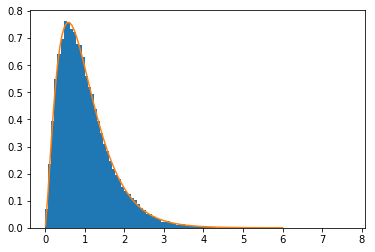

In [19]:
n4 = 5
X4 = np.column_stack((np.ones(m), np.random.uniform(size=(m, n4))))
M = np.identity(m) - X4.dot(np.linalg.inv(X4.T.dot(X4))).dot(X4.T)

fvals = []
for _ in range(50000):
    y_f = np.random.normal(loc=6, scale=0.5, size=100)
    e_f = M.dot(y_f)
    # Total sum of squares
    tss = m * np.var(y_f)
    # Residual sum of squares
    rss = np.dot(e_f, e_f)
    fvals.append(((tss - rss) / n4) / (rss / (m - n4 - 1)))

plt.hist(fvals, bins=100, normed=True);
fx = np.linspace(0.01, 6, 100)
plt.plot(fx, stats.f.pdf(fx, n4, m - n4 - 1));

Nice! We can also prove this analytically. Let $1_m$ denote the $m$-dimensional vector of $1$s. Then, we can express the mean of $Y$ as follows:

\begin{equation}
\langle Y \rangle = \alpha 1_m.
\end{equation}

Note that

\begin{equation}
M\langle Y \rangle
    = M(\alpha 1_m)
    = \alpha M 1_m
    = \alpha(I - X(X^TX)^{-1}X^T)1_m
    = \alpha(1_m - 1_m)=0,
\end{equation}

where the second last equality follows from $X(X^TX)^{-1}X^T1_m = 1_m$ (to see why, apply $X^T$ to both sides). As a result, we can express $\hat{e}$ follows:

\begin{equation}
\hat{e} = M(Y - \langle Y \rangle).
\end{equation}



\begin{equation}
\hat{e}^T\hat{e}
    = (Y - \langle Y \rangle)^TM^TM(Y - \langle Y \rangle)
    = (Y - \langle Y \rangle)^TM(Y - \langle Y \rangle),
\end{equation}

where the last equality follows from $M^T=M$ and $M^2=M$. Also note that

\begin{equation}
y^{(i)} - \bar{y}
    = \sum_{k=1}^{m} (\delta_{ik} - 1/m)y^{(k)}
    = \sum_{k=1}^{m} (\delta_{ik} - 1/m)(y^{(k)} - \alpha)
    = \sum_{k=1}^{m} W_{ik}(y^{(k)} - \langle y^{(k)} \rangle),
\end{equation}

where the second equality follows from $\sum_{k=1}^{m} (\delta_{ik} - 1/m)=0$ and we've introduced the matrix $W$:

\begin{equation}
W_{ik} \equiv \delta_{ik} - \frac{1}{m}.
\end{equation}

It's easy to check that, just like $M$, $W$ is idempotent (i.e. $W^2=W$). This can in turn be used to show:

\begin{equation}
\sum_{i=1}^{m}(y^{(i)} - \bar{y})^2 = (Y - \langle Y \rangle)^TW(Y - \langle Y \rangle).
\end{equation}

The numerator of our test-statistic can be written as:

\begin{equation}
\sum_{i=1}^{m}(y^{(i)} - \bar{y})^2 - \hat{e}^T\hat{e} = (Y - \langle Y \rangle)^T(W - M)(Y - \langle Y \rangle).
\end{equation}

Note that $W - M$ is also idempotent:

\begin{equation}
(W - M)^2
    = W^2 - WM - WB + M^2
    = W - M - M + M
    = W - M,
\end{equation}

where the second equality uses $WM=MW=M$. Consider now the following definitions:

\begin{equation}
B_1 \equiv M, \qquad
B_2 \equiv W - M, \qquad
B_3 \equiv I - W,
\end{equation}

as well as

\begin{equation}
Q_1 \equiv (Y - \langle Y \rangle)^TB_1(Y - \langle Y \rangle), \qquad
Q_2 \equiv (Y - \langle Y \rangle)^TB_2(Y - \langle Y \rangle), \qquad
Q_3 \equiv (Y - \langle Y \rangle)^TB_3(Y - \langle Y \rangle).
\end{equation}

$B_1$, $B_2$, and $B_3$ are idempotent, so their ranks are given by their traces. It then follows from  $\text{tr}(M) = m - n - 1$ (we have proven this already) and $\text{tr}(W) = m - 1$ that: $\text{rank}(B_1) = m - n - 1$, $\text{rank}(B_2) = n$, $\text{rank}(B_3) = 1$.

Since $B_1 + B_2 + B_3 = I$ and $\text{rank}(B_1)+\text{rank}(B_1)+\text{rank}(B_1)=m$, the conditions of Cochran's theorem are satisfied. It then follows that $Q_1 \sim \chi^2_{m-n-1}$, $Q_2 \sim \chi^2_{n}$, and that $Q_1$ and $Q_2$ are independent. This in turn implies that

\begin{equation}
f = \frac{m - n - 1}{n}\frac{\sum_{i=1}^{m}(y^{(i)} - \bar{y})^2 - \hat{e}^T\hat{e}}{\hat{e}^T\hat{e}}
  = \frac{Q_2/n}{Q_1/(m-n-1)}
\end{equation}

is distributed as $F(n,m-n-1)$.